In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import pandas as pd
dataset=pd.read_csv("creditcard.csv")

In [4]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [7]:
x=scalar.fit_transform(dataset.drop("Class",axis=1))
y=dataset["Class"]

In [8]:
x

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
print(x_train.shape)

(227845, 30)


In [12]:
n=x_train.shape[1]

In [13]:
print(n)

30


In [14]:
encoder=keras.models.Sequential([
    keras.layers.Input(shape=(n,)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(16,activation='relu')
])

In [15]:
decoder=keras.models.Sequential([
    keras.layers.Input(shape=(16,)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(n,activation='linear')
])

In [16]:
model=keras.models.Sequential([
    encoder,decoder
])

In [17]:
model.compile(optimizer='adam',loss=keras.losses.MeanSquaredError(),metrics=['accuracy'])

In [18]:
model.fit(x_train,x_train,batch_size=30,epochs=5,validation_data=(x_test,x_test),shuffle=True)

Epoch 1/5
7595/7595 [==============================] - 36s 4ms/step - loss: 0.3091 - accuracy: 0.5483 - val_loss: 0.1836 - val_accuracy: 0.6565
Epoch 2/5
7595/7595 [==============================] - 34s 4ms/step - loss: 0.1542 - accuracy: 0.6754 - val_loss: 0.1315 - val_accuracy: 0.7032
Epoch 3/5
7595/7595 [==============================] - 33s 4ms/step - loss: 0.1254 - accuracy: 0.6973 - val_loss: 0.1074 - val_accuracy: 0.7072
Epoch 4/5
7595/7595 [==============================] - 35s 5ms/step - loss: 0.1035 - accuracy: 0.7154 - val_loss: 0.0967 - val_accuracy: 0.7233
Epoch 5/5
7595/7595 [==============================] - 36s 5ms/step - loss: 0.0958 - accuracy: 0.7257 - val_loss: 0.0895 - val_accuracy: 0.7320


In [19]:
pred=model.predict(x_test)

1781/1781 [==============================] - 5s 3ms/step


In [20]:
mse=np.mean(np.power(x_test-pred,2),axis=1)

In [21]:
threshold=np.arange(0.1,1.0,0.1)
for i in threshold:
    anamolies=mse>i
    
sum_of_anamolies=np.sum(anamolies)

In [22]:
print(sum_of_anamolies)

349


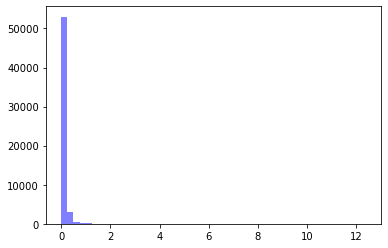

In [24]:
plt.hist(mse,bins=50,alpha=0.5,color='b')
plt.show()

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,anamolies))
print(classification_report(y_test,anamolies))

[[56564   300]
 [   49    49]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.50      0.22        98

    accuracy                           0.99     56962
   macro avg       0.57      0.75      0.61     56962
weighted avg       1.00      0.99      1.00     56962



<AxesSubplot:>

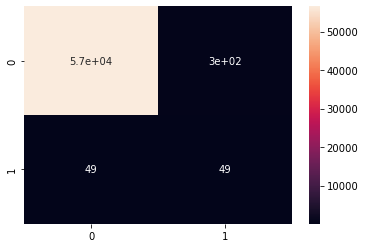

In [27]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,anamolies),annot=True)